In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import pickle
import os

In [2]:
# Load your dataframe
df = pd.read_csv("data/df_final_filtered2.csv")


# Remove stage, status, groupid
cols = [col for col in df.columns.to_list() if col not in ['stage','status','groupid']]
df = df[cols]

# fill missings 999
df = df.fillna(999)

# Prepare the data
# Replace 'target' with the name of your target column
X = df.drop(columns='starter')
y = df['starter']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Assuming your target variable has classes 'class_0', 'class_1', ..., you can replace these with your actual class names
class_names = ["drop out", "starter"]

model_dir = r"C:\Users\peter\Projects\HR_Forecasting\models"
# Replace 'your_model.pkl' with the path to your pickle file
with open(os.path.join(model_dir,'model_1.pkl'), 'rb') as file:
    brf = pickle.load(file)


In [3]:
import json
with open(os.path.join(model_dir,'model_1_meta.json'), 'r') as file:
    model_meta = json.load(file)

['belafspraak',
 'leeftijd',
 'geboortedatum',
 'jaar_ervaring',
 'diff_days',
 'recruiter_Job van den Berg',
 'utm_medium_organic',
 'Voorkeursbranche_elektrotechniek',
 'Voorkeursbranche_installatietechniek',
 'Provincie_Noord-Holland']

In [6]:
from sklearn import tree

# Assuming `brf` is your BalancedRandomForestClassifier
estimator = brf.estimators_[0]  # Get the first tree from the forest
tree_text = tree.export_text(estimator, feature_names=model_meta['selected_features'])

# Print the tree text in the notebook
print(tree_text)


|--- Voorkeursbranche_elektrotechniek <= 0.50
|   |--- Voorkeursbranche_installatietechniek <= 0.50
|   |   |--- diff_days <= 0.50
|   |   |   |--- geboortedatum <= -4543991617240956928.00
|   |   |   |   |--- belafspraak <= 1656105785513476096.00
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- belafspraak >  1656105785513476096.00
|   |   |   |   |   |--- class: 0.0
|   |   |   |--- geboortedatum >  -4543991617240956928.00
|   |   |   |   |--- class: 0.0
|   |   |--- diff_days >  0.50
|   |   |   |--- jaar_ervaring <= 502.50
|   |   |   |   |--- utm_medium_organic <= 0.50
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- utm_medium_organic >  0.50
|   |   |   |   |   |--- diff_days <= 4.00
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- diff_days >  4.00
|   |   |   |   |   |   |--- leeftijd <= 31.50
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- leeftijd >  31.50
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |--- ja

<Figure size 3600x1800 with 0 Axes>

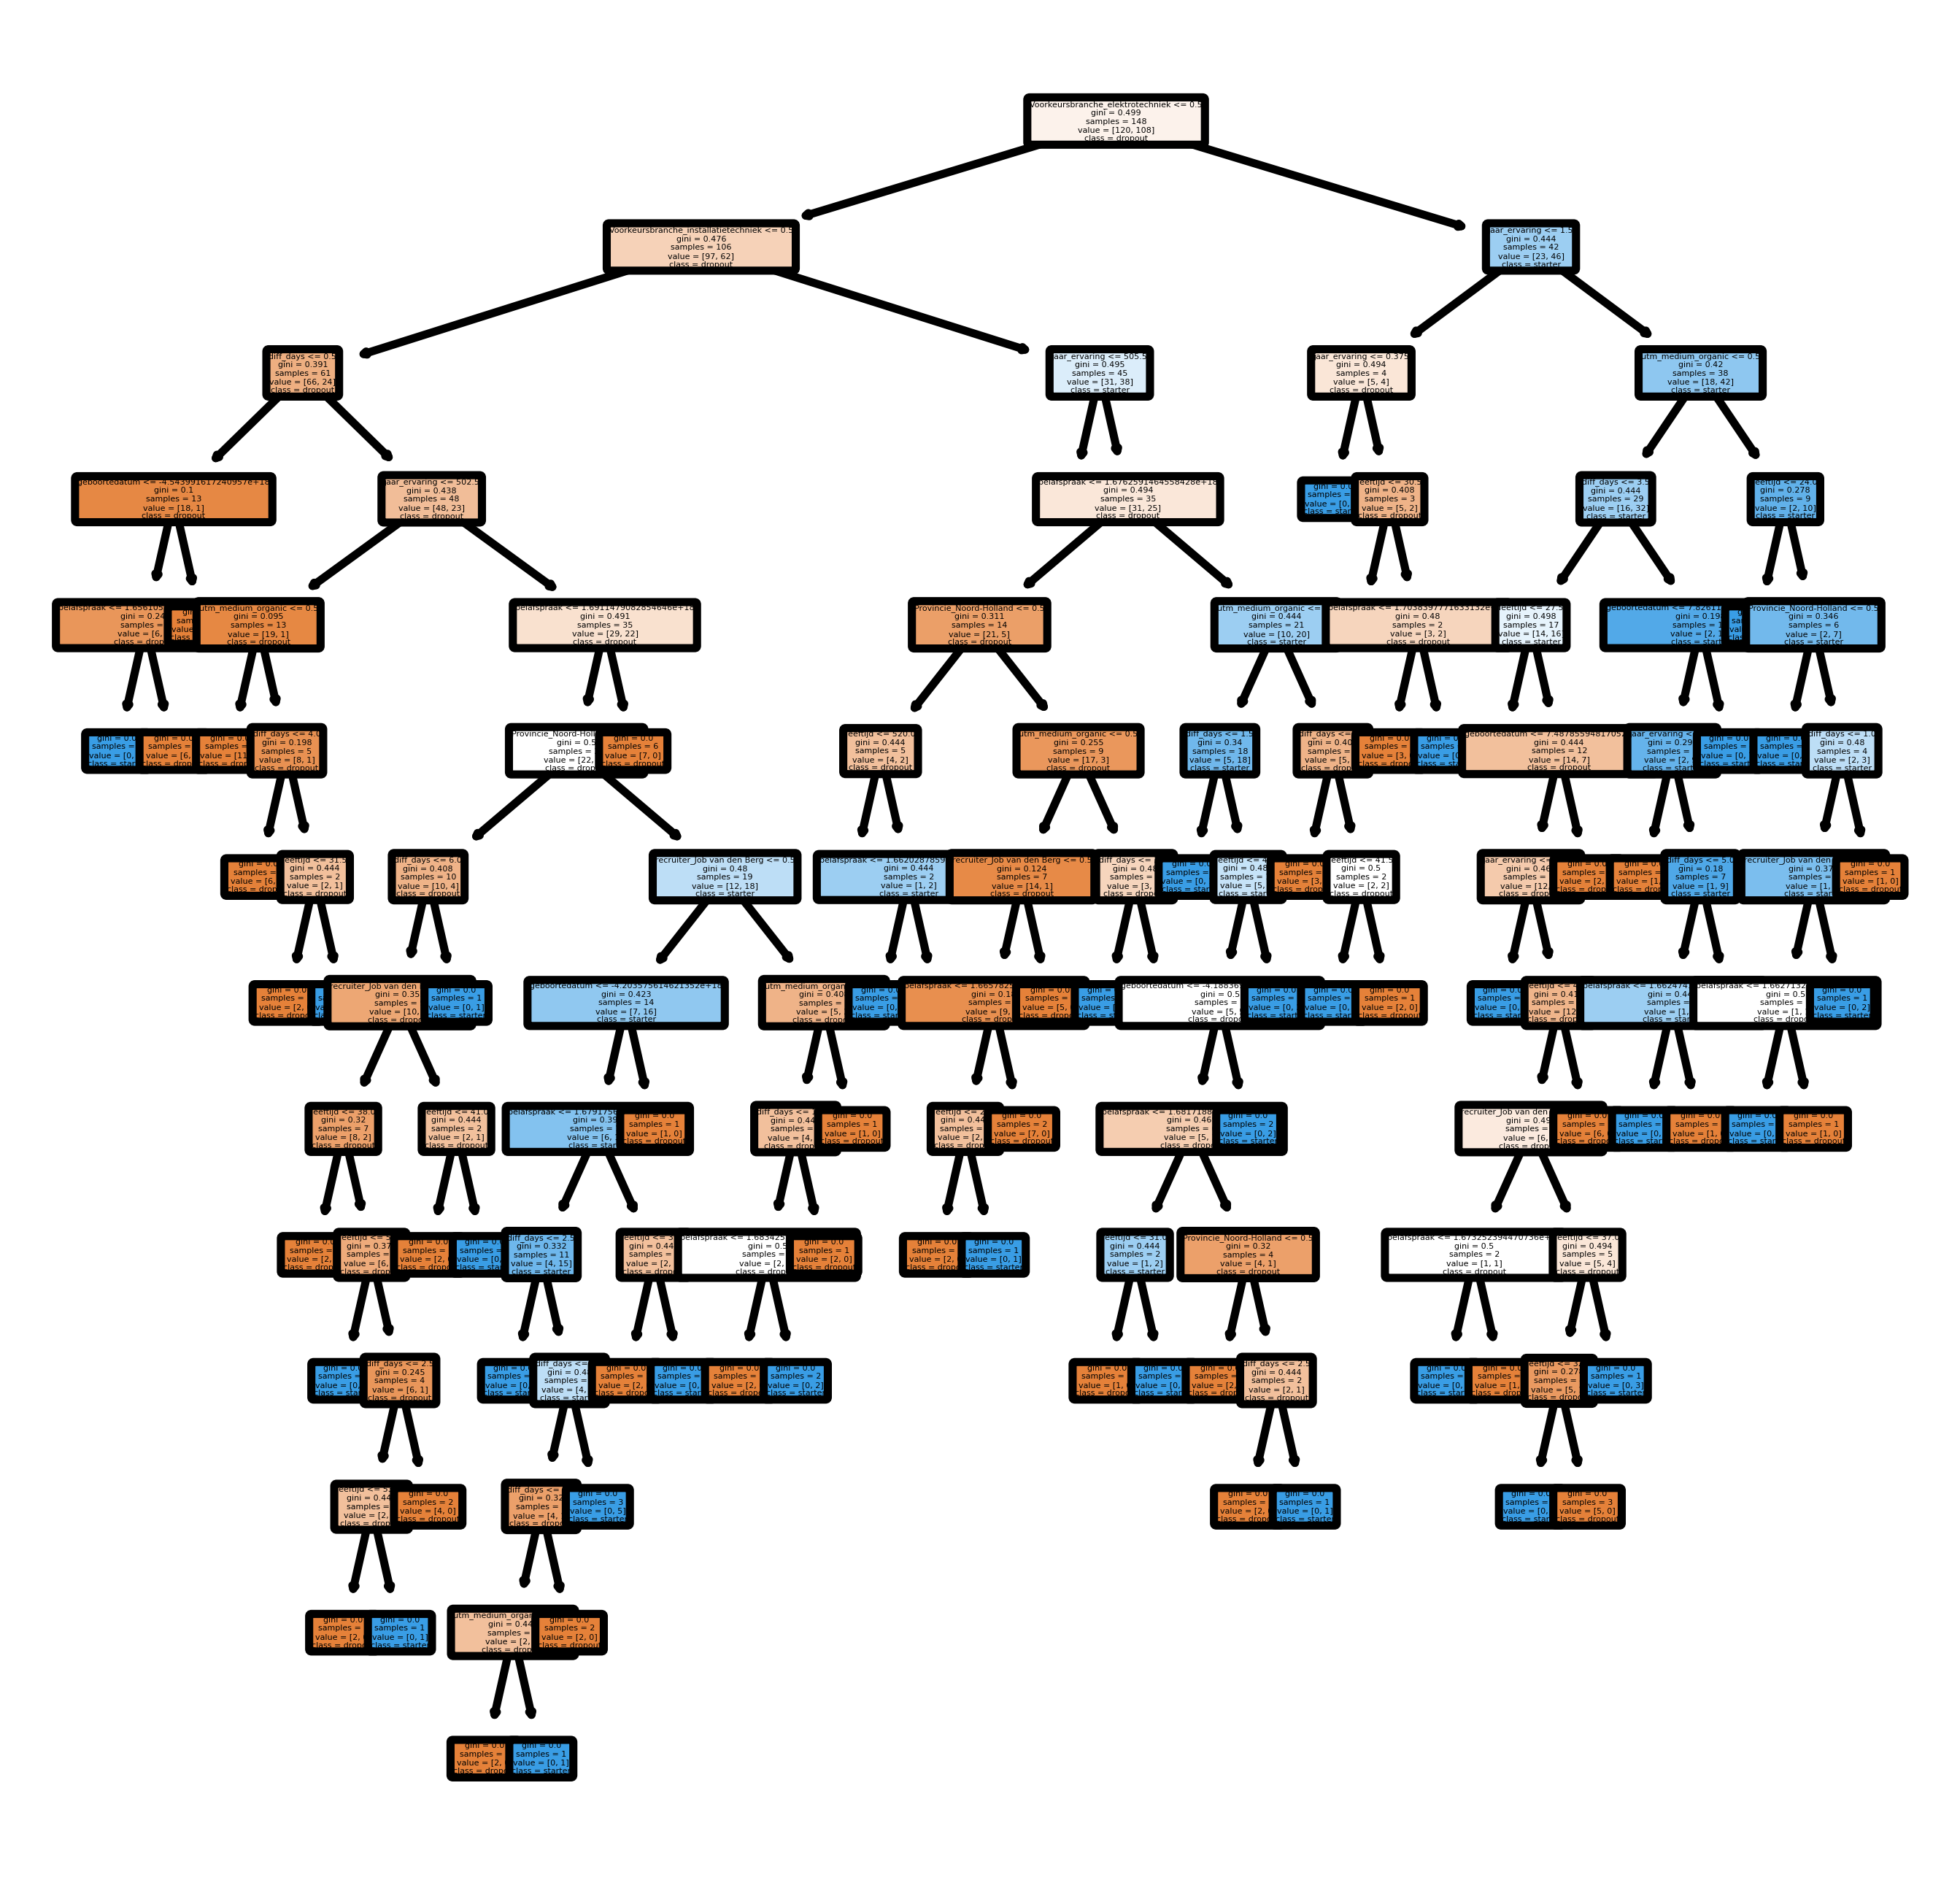

In [19]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Extract an individual decision tree
individual_tree = brf.estimators_[0]

# Visualize the decision tree
plt.figure(figsize=(50, 25))
classes = ['dropout','starter']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
plot_tree(individual_tree, 
          filled=True, 
          rounded=True, 
          feature_names=model_meta['selected_features'], 
          class_names=classes)
plt.show()
fig.savefig('brf_individualtree.png')

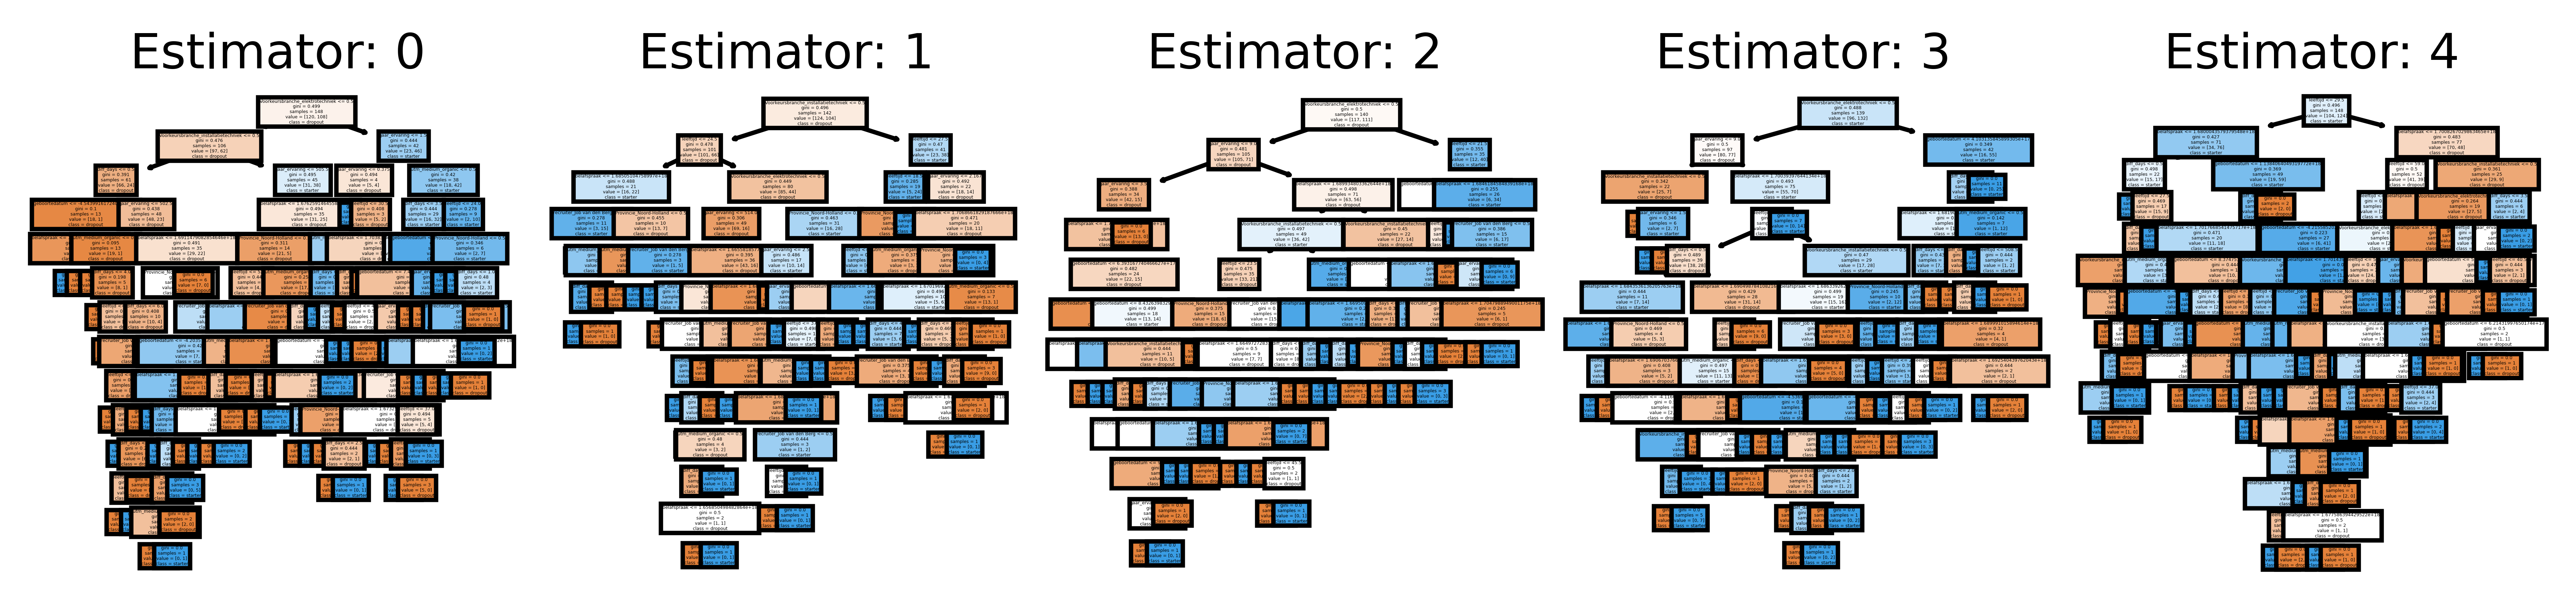

In [20]:
fn=model_meta['selected_features']
cn=classes
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(brf.estimators_[index],
                   feature_names = fn, 
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('brf_5trees.png')